# Hyperparameter Finetuning

In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
import datetime
from scipy import stats
from   pandas import  DataFrame



In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:


X_train=pd.read_csv('gdrive/My Drive/FinalRun/FP/X_train_feature_selection.csv')
X_test=pd.read_csv('gdrive/My Drive/FinalRun/FP/X_test_feature_selection.csv')
X_dev=pd.read_csv('gdrive/My Drive/FinalRun/FP/X_dev_feature_selection.csv')
y_train=pd.read_csv('gdrive/My Drive/FinalRun/FP/y_train_feature_selection.csv')
y_test=pd.read_csv('gdrive/My Drive/FinalRun/FP/y_test_feature_selection.csv')
y_dev=pd.read_csv('gdrive/My Drive/FinalRun/FP/y_dev_feature_selection.csv')
y_trainOpg = y_train.copy()
y_testORG = y_test.copy()
y_devORG = y_dev.copy()
y_train = y_train["accident_severity"]
y_test = y_test["accident_severity"]
y_dev = y_dev["accident_severity"]


X_train.head()


,accident_district,accident_hour,accident_id,accident_type,day_in_week,engine_volume,manufacturing_year,one_lane,road_light,vehicle_type,accident_municipal_status_imputed,accident_natural_area_imputed,accident_yishuv_shape_imputed,cross_location_imputed,cross_mode_imputed,multi_lane_imputed,road_intactness_imputed,road_width_imputed,speed_limit_imputed,street1_imputed,vehicle_damage_imputed
0,11,12,2018009337,3,6,6,2010,9,11,1,0,611,99,0,0,0,0,0,0,345,1
1,24,7,2008007226,15,1,6,1998,9,11,1,18,242,16,0,0,0,0,3,1,310,4
2,41,8,2010014339,4,6,8,2009,9,11,12,9,411,14,0,9,2,0,0,0,417,1
3,51,13,2017081241,4,2,6,2011,9,11,1,0,511,13,0,0,0,0,0,0,2378,4
4,99,16,2012043901,3,3,12,2011,3,1,5,99,999,99,0,0,0,1,2,4,0,4


In [6]:
y_train.head()

0    3
1    3
2    3
3    3
4    3
Name: accident_severity, dtype: int64

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier # the model 
from sklearn.model_selection import StratifiedKFold # number for cross-validation 
from sklearn.metrics import classification_report, plot_confusion_matrix


In [9]:

score = 'accuracy' # the default is f1-score

np.random.seed(0) # makes the random numbers predictable 
#kf = StratifiedKFold(random_state=0 ,n_splits=3) # n_splits default is 5

# Create the parameters for grid search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'max_depth': [5, 20, None],
    'n_estimators': [10, 25, 100]
}

# Create the based model 
rfc_grid = RandomForestClassifier()


In [11]:

# Create an Instance of grid search model
grid_search = GridSearchCV(rfc_grid, param_grid=param_grid, verbose=2, # an integer which controls the verbosity
                           scoring=score, cv=3, n_jobs=-1) # n_jobs=-1 make it worl in parallel on all processors
                            


In [12]:
# train the grid
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  6.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [13]:

print("Best parameters set found on validation set:")
print(grid_search.best_params_, '\n')

Best parameters set found on validation set:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100} 



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           1       0.54      0.03      0.05       953
           2       0.57      0.08      0.13      5731
           3       0.97      1.00      0.99    213333

    accuracy                           0.97    220017
   macro avg       0.70      0.37      0.39    220017
weighted avg       0.96      0.97      0.96    220017



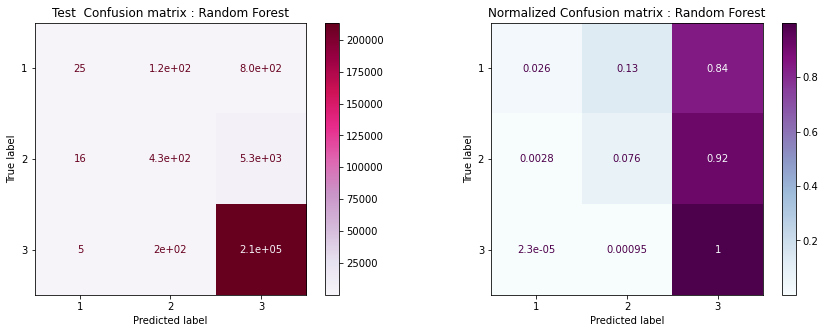

In [17]:
best_model = grid_search.best_estimator_ # take the best model
print(best_model)
#y_preddev = best_model.predict(X_dev)
#print(classification_report(y_dev, y_preddev))


y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.PuRd,  ax=ax[0])
ax[0].set_title('Test  Confusion matrix : Random Forest');

plot_confusion_matrix(best_model, X_test, y_test, cmap=plt.cm.BuPu, normalize='true', ax=ax[1])
ax[1].set_title('Normalized Confusion matrix : Random Forest');

In [ ]:
#  I have problem with HOT   ...  so I took minimum params  and I think that the problem ..
#  but for me I understood the idea  ....

In [ ]:
#  END

In [1]:
#  the distribution of 3 type f acc. by the model
X_testMinor = X_test.copy()
X_testBad = X_test.copy()

X_testMinor["accident_severity"] = y_pred.copy()
X_testBad["accident_severity"] = y_pred.copy()
df_Acc_Bad = X_testBad[(X_testBad.accident_severity != 3) ]
df_Acc_Minor = X_testMinor[(X_testMinor.accident_severity == 3) ]

fig = df_Acc_Minor.groupby(['accident_year', 'accident_severity'])['accident_id'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Minor Acc at period time')
fig.set_ylabel('Num Acc')

fig = df_Acc_Bad.groupby(['accident_year', 'accident_severity'])['accident_id'].sum().unstack().plot(
    figsize=(14, 8), linewidth=2)

fig.set_title('Bad Acc at period time')
fig.set_ylabel('Num Acc')


NameError: name 'X_test' is not defined

In [ ]:
####################################################